# Non Negative Matrix Factorization (NMF)

* Here, lets say we are interested in a signal that is a combination of three different sources

Text(0, 0.5, 'Signal')

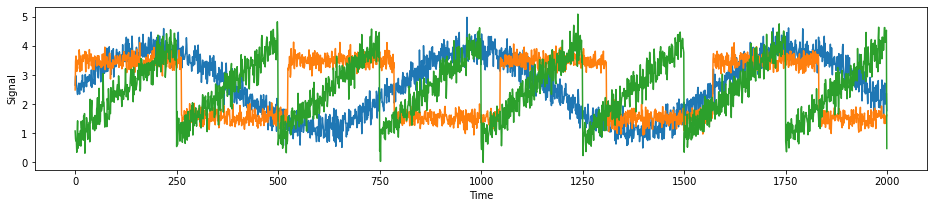

In [6]:
import mglearn
from matplotlib import pyplot as plt

S = mglearn.datasets.make_signals()
plt.figure(figsize=(16, 3))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

**Note**
* We cannot observe the original signals, but only additive mixture of all three of them
* We want to recover the decomposition of the mixed signals into original components

In [9]:
#mix data into a 100 dimensional state

import numpy as np
A = np.random.RandomState(0).uniform(size=(100, 3))
X=np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


* We can use NMF to recover these signals

In [13]:
from sklearn.decomposition import NMF

nmf=NMF(n_components = 3, random_state=42)
S_=nmf.fit_transform(X)

print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


C:\Users\arman\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [16]:
#For comparison we also apply PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

print("Recovered signal shape: {}".format(H.shape))

Recovered signal shape: (2000, 3)


* Lets display the signal activity discovered by NMF and PCA

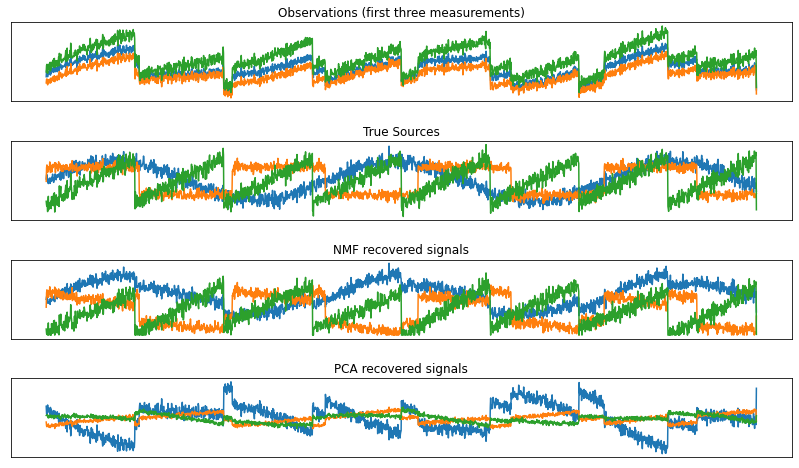

In [23]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
        'True Sources',
        'NMF recovered signals',
        'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(14,8), gridspec_kw={'hspace': .5},
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

* As ypu can see NMF did a responsible job of discovering original sources and PCA failed to do that.